In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv("diamonds.csv", sep=",", decimal=".", encoding="ansi",  index_col=0).reset_index(drop=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
color_items = df['color'].value_counts()
color_items

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [3]:
cut_items = df['cut'].value_counts()
cut_items

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [4]:
clarity_items = df['clarity'].value_counts()
clarity_items

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [5]:
df_cut = df.copy()
color_mapping = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
cut_mapping = {'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}
clarity_mapping = {'SI1': 0,'VS2': 1, 'SI2': 2, 'VS1': 3, 'VVS2': 4, 'VVS1': 5, 'IF': 6, 'I1': 7} 
df_cut['color'] = df_cut['color'].map(color_mapping)
df_cut['cut'] = df['cut'].map(cut_mapping)
df_cut['clarity'] = df_cut['clarity'].map(clarity_mapping)
df_cut.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

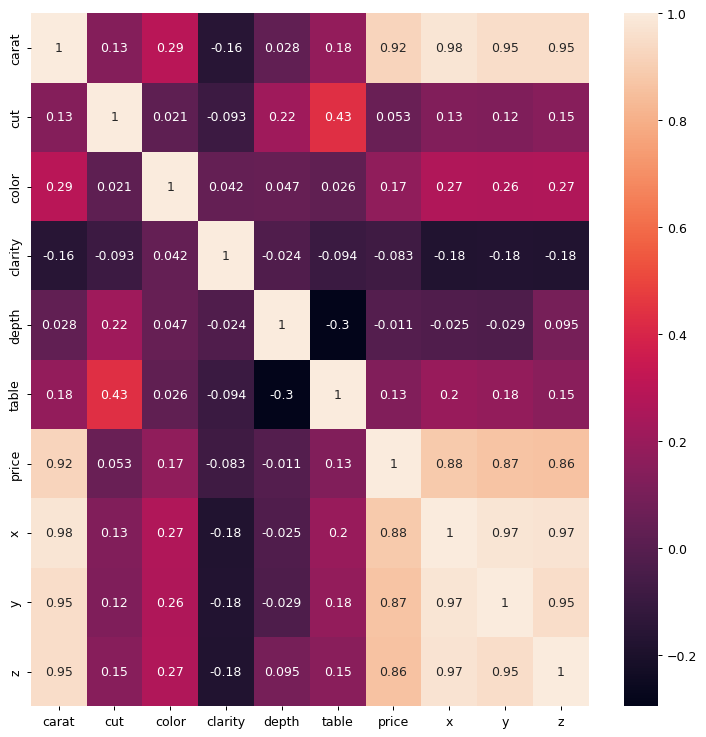

In [6]:
plt.figure(figsize=(10,10), dpi=90)
sn.heatmap(df_cut.corr(), xticklabels=df_cut.corr().columns, yticklabels=df_cut.corr().columns, annot=True)

На качество огранки больше всего влияют глубина и размер верхней площадки, немного карат и размеры x,y,z

In [7]:
X = df_cut[['carat','depth', 'table', 'x', 'y', 'z']]
y = df_cut['cut'].values
X

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [8]:
counts = df_cut['cut'].value_counts()
c = [0, 1, 2, 3, 4]
for i in c:
    print(f"{i}: {counts.get(i)}")


0: 21551
1: 13791
2: 12082
3: 4906
4: 1610


Так как бриллиантов с оценкой огранки 0, 1, 2 изначально значительно больше, оценка моделей будет сильно смещена преимущественно к этим значениям

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler

model_dec_tree = DecisionTreeClassifier(random_state=42)
model_dec_tree.fit(X_train, y_train)
y_pred_dec_tree = model_dec_tree.predict(X_test)

model_rnd_tree = RandomForestClassifier(n_estimators=100 ,
                               oob_score=True,
                               random_state=1)
model_rnd_tree.fit(X_train, y_train)
y_pred_rnd_tree = model_rnd_tree.predict(X_test)

model_xgbc = XGBClassifier(learning_rate=0.07, max_depth=5)
model_xgbc.fit(X_train, y_train)
y_pred_xgbc = model_xgbc.predict(X_test)

model_cat = CatBoostClassifier(learning_rate=0.07, max_depth=5, silent=True)
model_cat.fit(X_train, y_train)
y_pred_cat = model_cat.predict(X_test)

model_line = LinearSVC()
model_line.fit(X_train, y_train)
y_pred_line = model_line.predict(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

model_kneigh = KNeighborsClassifier(n_neighbors=5)
model_kneigh.fit(X_train_scaler, y_train)
y_pred_kneigh = model_kneigh.predict(X_test_scaler)

In [11]:
for i in range(30):
    print(y_pred_cat[i], end=" ")

[0] [0] [1] [0] [0] [0] [2] [0] [2] [0] [0] [0] [0] [1] [3] [1] [0] [1] [4] [2] [0] [0] [0] [1] [2] [0] [0] [0] [1] [2] 

In [12]:
from sklearn.metrics import classification_report
from IPython.display import display, HTML

html_code = """
<div style="display: flex; gap: 20px;">
    <div>
    <p>{t_name_1}</p>
        {table1}
    </div>
    <div>
    <p>{t_name_2}</p>
        {table2}
    </div>
</div>
"""

results = [y_pred_cat, y_pred_xgbc, y_pred_dec_tree,  y_pred_rnd_tree,y_pred_kneigh, y_pred_line]

model_names = [
    'CatBoost',
    'XGBoost',
    'Decision Tree',
    'Random Forest',
    'K-Nearest Neighbors',
    'Linear Model'
]

tables = []
accuracy_rep = {}
for i in range(len(results)):
    # Получаем полный отчёт в виде словаря
    report = classification_report(y_test, results[i], output_dict=True)
    accuracy_rep[model_names[i]] = report['accuracy']
    # Преобразуем отчёт в DataFrame и добавляем в список
    df_report = pd.DataFrame(report).transpose()
    tables.append(df_report)

for i in range(0, len(tables)-1, 2):
    display(HTML(html_code.format(t_name_1=model_names[i], t_name_2=model_names[i + 1], table1=tables[i].to_html(), table2=tables[i+1].to_html())))

accuracy_rep = pd.DataFrame.from_dict(accuracy_rep, orient='index', columns=['Accuracy'])
accuracy_rep



,precision,recall,f1-score,support
0,0.823448,0.924825,0.871197,6425.000000
1,0.776239,0.832176,0.803235,4177.000000
2,0.703872,0.555006,0.620637,3636.000000
3,0.823427,0.643882,0.722670,1463.000000
4,0.901468,0.893971,0.897704,481.000000
accuracy,0.791497,0.791497,0.791497,0.791497
macro avg,0.805691,0.769972,0.783088,16182.000000
weighted avg,0.786711,0.791497,0.784715,16182.000000
,precision,recall,f1-score,support
0,0.817893,0.922023,0.866842,6425.00000


,precision,recall,f1-score,support
0,0.790611,0.796887,0.793737,6425.00000
1,0.755268,0.755087,0.755178,4177.00000
2,0.535921,0.535479,0.535700,3636.00000
3,0.688080,0.658920,0.673184,1463.00000
4,0.830645,0.856549,0.843398,481.00000
accuracy,0.716660,0.716660,0.716660,0.71666
macro avg,0.720105,0.720584,0.720239,16182.00000
weighted avg,0.716181,0.716660,0.716381,16182.00000
,precision,recall,f1-score,support
0,0.822216,0.894008,0.856610,6425.000000


,precision,recall,f1-score,support
0,0.795799,0.914086,0.850851,6425.00000
1,0.675559,0.751736,0.711615,4177.00000
2,0.559575,0.391364,0.460592,3636.00000
3,0.709061,0.583049,0.639910,1463.00000
4,0.904412,0.767152,0.830146,481.00000
accuracy,0.720430,0.720430,0.720430,0.72043
macro avg,0.728881,0.681477,0.698623,16182.00000
weighted avg,0.707071,0.720430,0.707535,16182.00000
,precision,recall,f1-score,support
0,0.644635,0.959377,0.771127,6425.000000


,Accuracy
CatBoost,0.791497
XGBoost,0.751020
Decision Tree,0.716660
Random Forest,0.778334
K-Nearest Neighbors,0.720430
Linear Model,0.602521


In [13]:
html_code = """
<div style="display: flex; gap: 20px;">
    <div>
    <p>{t_name_1}</p>
        {table1}
    </div>
    <div>
    <p>{t_name_2}</p>
        {table2}
    </div>
</div>
"""

tables = []
for i in range(len(results)):
    # Преобразуем все предсказания к 1D массиву
    if results[i].ndim == 2:
        pred_flat = results[i].flatten()
    else:
        pred_flat = results[i]
    
    tables.append(pd.crosstab(y_test, pred_flat))

for i in range(0, len(tables)-1, 2):
    display(HTML(html_code.format(t_name_1=model_names[i], t_name_2=model_names[i + 1], table1=tables[i].to_html(), table2=tables[i+1].to_html())))

col_0,0,1,2,3,4
row_0,,,,,
0,5942,268,205,8,2
1,446,3476,252,3,0
2,804,655,2018,157,2
3,22,70,386,942,43
4,2,9,6,34,430
col_0,0,1,2,3,4
row_0,,,,,
0,5924,320,172,7,2
1,451,3617,106,3,0


col_0,0,1,2,3,4
row_0,,,,,
0,5120,462,807,26,10
1,477,3154,494,37,15
2,833,510,1947,332,14
3,38,40,376,964,45
4,8,10,9,42,412
col_0,0,1,2,3,4
row_0,,,,,
0,5744,289,379,11,2
1,441,3374,354,7,1


col_0,0,1,2,3,4
row_0,,,,,
0,5873,286,257,9,0
1,538,3140,473,26,0
2,933,1050,1423,228,2
3,33,163,377,853,37
4,3,9,13,87,369
col_0,0,1,2,3,4
row_0,,,,,
0,6164,196,64,0,1
1,1064,2799,314,0,0


In [14]:
print("Распределение предсказаний LinearSVC:")
pred_counts = pd.Series(y_pred_line).value_counts().sort_index()
print(pred_counts)

print(f"\nВсего уникальных предсказанных классов: {pred_counts.index.tolist()}")
print(f"Есть ли предсказания со значением 3: {3 in y_pred_line}")
print(f"Количество предсказаний класса 3: {pred_counts.get(3, 0)}")

# Посмотрим на вероятности (если model_line поддерживает predict_proba)
if hasattr(model_line, 'predict_proba'):
    y_proba = model_line.predict_proba(X_test)
    print(f"\nФорма вероятностей: {y_proba.shape}")
    print("Средние вероятности по классам:")
    print(pd.Series(y_proba.mean(axis=0)).round(4))

Распределение предсказаний LinearSVC:
0    9562
1    4752
2    1790
3       1
4      77
Name: count, dtype: int64

Всего уникальных предсказанных классов: [0, 1, 2, 3, 4]
Есть ли предсказания со значением 3: True
Количество предсказаний класса 3: 1
